<a href="https://colab.research.google.com/github/atulwadekar/covid-data/blob/master/Plot_rates_against_tenor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DailyTreasuryYieldCurveRateData to DailyTreasuryYieldCurveRateData


In [ ]:
with open('FRB_H15_lists.csv', 'r') as fp:
  FRB_csv = fp.read()
df = pd.read_csv('FRB_H15_lists.csv')

In [ ]:
df2 = df.iloc[5:]

In [ ]:
df2.head(10)

,Series Description,Federal funds effective rate
5,2000-01-01,3.99
6,2000-01-02,3.99
7,2000-01-03,5.43
8,2000-01-04,5.38
9,2000-01-05,5.41
10,2000-01-06,5.54
11,2000-01-07,5.61
12,2000-01-08,5.61
13,2000-01-09,5.61
14,2000-01-10,5.74


In [ ]:
df.describe()

,Series Description,Federal funds effective rate
count,7810,7809
unique,7810,554
top,2000-05-09,0.09
freq,1,555


In [ ]:
df['Federal funds effective rate']

0         Percent:_Per_Year
1                         1
2                       NaN
3       H15/H15/RIFSPFF_N.D
4               RIFSPFF_N.D
               ...         
7805                   0.06
7806                   0.06
7807                   0.06
7808                   0.06
7809                   0.06
Name: Federal funds effective rate, Length: 7810, dtype: object

In [ ]:
%matplotlib inline

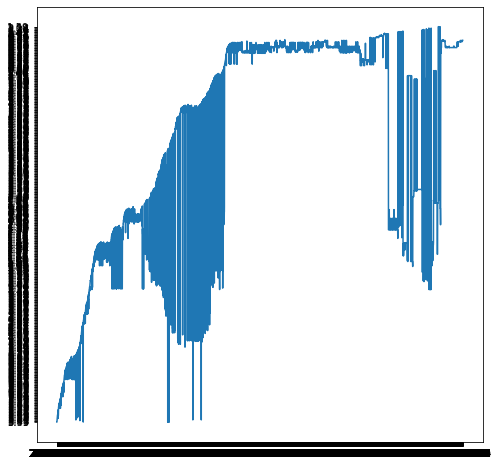

In [ ]:
plt.figure(figsize=[8,8])
plt.plot(df2['Series Description'], df2['Federal funds effective rate'])
plt.show()

In [ ]:
import xml.etree.ElementTree as ET

In [ ]:
with open('DailyTreasuryYieldCurveRateData', 'r') as fp:
    xml_data = fp.read()
root = ET.XML(xml_data)
data = []
cols = []
for i, child in enumerate(root):
    data.append([subchild.text for subchild in child])
    cols.append(child.tag)
df = pd.DataFrame(data).T
df.columns = cols

In [ ]:
df.head(10)

In [ ]:
!pip install pandas_read_xml

     |████████████████████████████████| 337kB 20.2MB/s 
     |████████████████████████████████| 153kB 54.1MB/s 
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
!python3 -m pip install --upgrade pip

     |████████████████████████████████| 1.6MB 13.0MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
import pandas_read_xml as pdx

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
with open('DailyTreasuryYieldCurveRateData', 'r') as rf:
    rate_data = rf.read()

In [ ]:
df = pdx.read_xml(rate_data, ['feed','entry'], root_is_rows=False)

In [ ]:
from pandas_read_xml import flatten, fully_flatten, auto_separate_tables

In [ ]:
df = df.pipe(flatten)

In [ ]:
df = df.pipe(flatten)

In [ ]:
df.head()

,id,updated,title|@type,author|name,link|@rel,link|@title,link|@href,category|@term,category|@scheme,content|@type,content|m:properties|d:Id,content|m:properties|d:NEW_DATE,content|m:properties|d:BC_1MONTH,content|m:properties|d:BC_2MONTH,content|m:properties|d:BC_3MONTH,content|m:properties|d:BC_6MONTH,content|m:properties|d:BC_1YEAR,content|m:properties|d:BC_2YEAR,content|m:properties|d:BC_3YEAR,content|m:properties|d:BC_5YEAR,content|m:properties|d:BC_7YEAR,content|m:properties|d:BC_10YEAR,content|m:properties|d:BC_20YEAR,content|m:properties|d:BC_30YEAR,content|m:properties|d:BC_30YEARDISPLAY
0,http://data.treasury.gov/Feed.svc/DailyTreasur...,2021-05-19T01:10:16Z,text,None,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(7759),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,application/xml,"{'@m:type': 'Edm.Int32', '#text': '7759'}","{'@m:type': 'Edm.DateTime', '#text': '2021-01-...","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.1'}","{'@m:type': 'Edm.Double', '#text': '0.11'}","{'@m:type': 'Edm.Double', '#text': '0.16'}","{'@m:type': 'Edm.Double', '#text': '0.36'}","{'@m:type': 'Edm.Double', '#text': '0.64'}","{'@m:type': 'Edm.Double', '#text': '0.93'}","{'@m:type': 'Edm.Double', '#text': '1.46'}","{'@m:type': 'Edm.Double', '#text': '1.66'}","{'@m:type': 'Edm.Double', '#text': '1.66'}"
1,http://data.treasury.gov/Feed.svc/DailyTreasur...,2021-05-19T01:10:16Z,text,None,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(7760),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,application/xml,"{'@m:type': 'Edm.Int32', '#text': '7760'}","{'@m:type': 'Edm.DateTime', '#text': '2021-01-...","{'@m:type': 'Edm.Double', '#text': '0.08'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.1'}","{'@m:type': 'Edm.Double', '#text': '0.13'}","{'@m:type': 'Edm.Double', '#text': '0.17'}","{'@m:type': 'Edm.Double', '#text': '0.38'}","{'@m:type': 'Edm.Double', '#text': '0.66'}","{'@m:type': 'Edm.Double', '#text': '0.96'}","{'@m:type': 'Edm.Double', '#text': '1.49'}","{'@m:type': 'Edm.Double', '#text': '1.7'}","{'@m:type': 'Edm.Double', '#text': '1.7'}"
2,http://data.treasury.gov/Feed.svc/DailyTreasur...,2021-05-19T01:10:16Z,text,None,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(7761),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,application/xml,"{'@m:type': 'Edm.Int32', '#text': '7761'}","{'@m:type': 'Edm.DateTime', '#text': '2021-01-...","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.11'}","{'@m:type': 'Edm.Double', '#text': '0.14'}","{'@m:type': 'Edm.Double', '#text': '0.2'}","{'@m:type': 'Edm.Double', '#text': '0.43'}","{'@m:type': 'Edm.Double', '#text': '0.74'}","{'@m:type': 'Edm.Double', '#text': '1.04'}","{'@m:type': 'Edm.Double', '#text': '1.6'}","{'@m:type': 'Edm.Double', '#text': '1.81'}","{'@m:type': 'Edm.Double', '#text': '1.81'}"
3,http://data.treasury.gov/Feed.svc/DailyTreasur...,2021-05-19T01:10:16Z,text,None,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(7762),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,application/xml,"{'@m:type': 'Edm.Int32', '#text': '7762'}","{'@m:type': 'Edm.DateTime', '#text': '2021-01-...","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '

In [ ]:
df = df.filter(regex='^content\|m:properties')

In [ ]:
df.head()

,content|m:properties|d:Id,content|m:properties|d:NEW_DATE,content|m:properties|d:BC_1MONTH,content|m:properties|d:BC_2MONTH,content|m:properties|d:BC_3MONTH,content|m:properties|d:BC_6MONTH,content|m:properties|d:BC_1YEAR,content|m:properties|d:BC_2YEAR,content|m:properties|d:BC_3YEAR,content|m:properties|d:BC_5YEAR,content|m:properties|d:BC_7YEAR,content|m:properties|d:BC_10YEAR,content|m:properties|d:BC_20YEAR,content|m:properties|d:BC_30YEAR,content|m:properties|d:BC_30YEARDISPLAY
0,"{'@m:type': 'Edm.Int32', '#text': '7759'}","{'@m:type': 'Edm.DateTime', '#text': '2021-01-...","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.1'}","{'@m:type': 'Edm.Double', '#text': '0.11'}","{'@m:type': 'Edm.Double', '#text': '0.16'}","{'@m:type': 'Edm.Double', '#text': '0.36'}","{'@m:type': 'Edm.Double', '#text': '0.64'}","{'@m:type': 'Edm.Double', '#text': '0.93'}","{'@m:type': 'Edm.Double', '#text': '1.46'}","{'@m:type': 'Edm.Double', '#text': '1.66'}","{'@m:type': 'Edm.Double', '#text': '1.66'}"
1,"{'@m:type': 'Edm.Int32', '#text': '7760'}","{'@m:type': 'Edm.DateTime', '#text': '2021-01-...","{'@m:type': 'Edm.Double', '#text': '0.08'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.1'}","{'@m:type': 'Edm.Double', '#text': '0.13'}","{'@m:type': 'Edm.Double', '#text': '0.17'}","{'@m:type': 'Edm.Double', '#text': '0.38'}","{'@m:type': 'Edm.Double', '#text': '0.66'}","{'@m:type': 'Edm.Double', '#text': '0.96'}","{'@m:type': 'Edm.Double', '#text': '1.49'}","{'@m:type': 'Edm.Double', '#text': '1.7'}","{'@m:type': 'Edm.Double', '#text': '1.7'}"
2,"{'@m:type': 'Edm.Int32', '#text': '7761'}","{'@m:type': 'Edm.DateTime', '#text': '2021-01-...","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.11'}","{'@m:type': 'Edm.Double', '#text': '0.14'}","{'@m:type': 'Edm.Double', '#text': '0.2'}","{'@m:type': 'Edm.Double', '#text': '0.43'}","{'@m:type': 'Edm.Double', '#text': '0.74'}","{'@m:type': 'Edm.Double', '#text': '1.04'}","{'@m:type': 'Edm.Double', '#text': '1.6'}","{'@m:type': 'Edm.Double', '#text': '1.81'}","{'@m:type': 'Edm.Double', '#text': '1.81'}"
3,"{'@m:type': 'Edm.Int32', '#text': '7762'}","{'@m:type': 'Edm.DateTime', '#text': '2021-01-...","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.11'}","{'@m:type': 'Edm.Double', '#text': '0.14'}","{'@m:type': 'Edm.Double', '#text': '0.22'}","{'@m:type': 'Edm.Double', '#text': '0.46'}","{'@m:type': 'Edm.Double', '#text': '0.78'}","{'@m:type': 'Edm.Double', '#text': '1.08'}","{'@m:type': 'Edm.Double', '#text': '1.64'}","{'@m:type': 'Edm.Double', '#text': '1.85'}","{'@m:type': 'Edm.Double', '#text': '1.85'}"
4,"{'@m:type': 'Edm.Int32', '#text': '7763'}","{'@m:type': 'Edm.DateTime', '#text': '2021-01-...","{'@m:type': 'Edm.Double', '#text': '0.08'}","{'@m:type': 'Edm.Double', '#text': '0.08'}","{'@m:type': 'Edm.Double', '#text': '0.08'}","{'@m:type': 'Edm.Double', '#text': '0.09'}","{'@m:type': 'Edm.Double', '#text': '0.1'}","{'@m:type': 'Edm.Double', '#text': '0.14'}","{'@m:type': 'Edm.Double', '#text': '0.24'}","{'@m:type': 'Edm.Double', '#text': '0.49'}","{'@m:type': 'Edm.Double', '#text': '0.81'}","{'@m:type': 'Edm.Double', '#text': '1.13'}","{'@m:type': 'Edm.Double', '#text': '1.67'}","{'@m:type': 'Edm.Double', '#text': '1.87'}","{'@m:type': 'Edm.Double', '#text': '1.87'}"


In [ ]:
df = df.pipe(flatten)

In [ ]:
df.head()

,content|m:properties|d:Id|@m:type,content|m:properties|d:Id,content|m:properties|d:NEW_DATE|@m:type,content|m:properties|d:NEW_DATE,content|m:properties|d:BC_1MONTH|@m:type,content|m:properties|d:BC_1MONTH,content|m:properties|d:BC_2MONTH|@m:type,content|m:properties|d:BC_2MONTH,content|m:properties|d:BC_3MONTH|@m:type,content|m:properties|d:BC_3MONTH,content|m:properties|d:BC_6MONTH|@m:type,content|m:properties|d:BC_6MONTH,content|m:properties|d:BC_1YEAR|@m:type,content|m:properties|d:BC_1YEAR,content|m:properties|d:BC_2YEAR|@m:type,content|m:properties|d:BC_2YEAR,content|m:properties|d:BC_3YEAR|@m:type,content|m:properties|d:BC_3YEAR,content|m:properties|d:BC_5YEAR|@m:type,content|m:properties|d:BC_5YEAR,content|m:properties|d:BC_7YEAR|@m:type,content|m:properties|d:BC_7YEAR,content|m:properties|d:BC_10YEAR|@m:type,content|m:properties|d:BC_10YEAR,content|m:properties|d:BC_20YEAR|@m:type,content|m:properties|d:BC_20YEAR,content|m:properties|d:BC_30YEAR|@m:type,content|m:properties|d:BC_30YEAR,content|m:properties|d:BC_30YEARDISPLAY|@m:type,content|m:properties|d:BC_30YEARDISPLAY
0,Edm.Int32,7759,Edm.DateTime,2021-01-04T00:00:00,Edm.Double,0.09,Edm.Double,0.09,Edm.Double,0.09,Edm.Double,0.09,Edm.Double,0.1,Edm.Double,0.11,Edm.Double,0.16,Edm.Double,0.36,Edm.Double,0.64,Edm.Double,0.93,Edm.Double,1.46,Edm.Double,1.66,Edm.Double,1.66
1,Edm.Int32,7760,Edm.DateTime,2021-01-05T00:00:00,Edm.Double,0.08,Edm.Double,0.09,Edm.Double,0.09,Edm.Double,0.09,Edm.Double,0.1,Edm.Double,0.13,Edm.Double,0.17,Edm.Double,0.38,Edm.Double,0.66,Edm.Double,0.96,Edm.Double,1.49,Edm.Double,1.7,Edm.Double,1.7
2,Edm.Int32,7761,Edm.DateTime,2021-01-06T00:00:00,Edm.Double,0.09,Edm.Double,0.09,Edm.Double,0.09,Edm.Double,0.09,Edm.Double,0.11,Edm.Double,0.14,Edm.Double,0.2,Edm.Double,0.43,Edm.Double,0.74,Edm.Double,1.04,Edm.Double,1.6,Edm.Double,1.81,Edm.Double,1.81
3,Edm.Int32,7762,Edm.DateTime,2021-01-07T00:00:00,Edm.Double,0.09,Edm.Double,0.09,Edm.Double,0.09,Edm.Double,0.09,Edm.Double,0.11,Edm.Double,0.14,Edm.Double,0.22,Edm.Double,0.46,Edm.Double,0.78,Edm.Double,1.08,Edm.Double,1.64,Edm.Double,1.85,Edm.Double,1.85
4,Edm.Int32,7763,Edm.DateTime,2021-01-08T00:00:00,Edm.Double,0.08,Edm.Double,0.08,Edm.Double,0.08,Edm.Double,0.09,Edm.Double,0.1,Edm.Double,0.14,Edm.Double,0.24,Edm.Double,0.49,Edm.Double,0.81,Edm.Double,1.13,Edm.Double,1.67,Edm.Double,1.87,Edm.Double,1.87


In [ ]:
df = df.drop(df.filter(regex='@m:type').columns, axis=1)

In [ ]:
df.head()

,content|m:properties|d:Id,content|m:properties|d:NEW_DATE,content|m:properties|d:BC_1MONTH,content|m:properties|d:BC_2MONTH,content|m:properties|d:BC_3MONTH,content|m:properties|d:BC_6MONTH,content|m:properties|d:BC_1YEAR,content|m:properties|d:BC_2YEAR,content|m:properties|d:BC_3YEAR,content|m:properties|d:BC_5YEAR,content|m:properties|d:BC_7YEAR,content|m:properties|d:BC_10YEAR,content|m:properties|d:BC_20YEAR,content|m:properties|d:BC_30YEAR,content|m:properties|d:BC_30YEARDISPLAY
0,7759,2021-01-04T00:00:00,0.09,0.09,0.09,0.09,0.1,0.11,0.16,0.36,0.64,0.93,1.46,1.66,1.66
1,7760,2021-01-05T00:00:00,0.08,0.09,0.09,0.09,0.1,0.13,0.17,0.38,0.66,0.96,1.49,1.7,1.7
2,7761,2021-01-06T00:00:00,0.09,0.09,0.09,0.09,0.11,0.14,0.2,0.43,0.74,1.04,1.6,1.81,1.81
3,7762,2021-01-07T00:00:00,0.09,0.09,0.09,0.09,0.11,0.14,0.22,0.46,0.78,1.08,1.64,1.85,1.85
4,7763,2021-01-08T00:00:00,0.08,0.08,0.08,0.09,0.1,0.14,0.24,0.49,0.81,1.13,1.67,1.87,1.87


In [ ]:
import re
def correct_col_names(full_str):
    m = re.search('content.*:(.*)$', full_str)
    return m.group(1)

In [ ]:
correct_col_names('content|m:properties|d:NEW_DATE')

'NEW_DATE'

In [ ]:
df.columns

Index(['content|m:properties|d:Id', 'content|m:properties|d:NEW_DATE',
       'content|m:properties|d:BC_1MONTH', 'content|m:properties|d:BC_2MONTH',
       'content|m:properties|d:BC_3MONTH', 'content|m:properties|d:BC_6MONTH',
       'content|m:properties|d:BC_1YEAR', 'content|m:properties|d:BC_2YEAR',
       'content|m:properties|d:BC_3YEAR', 'content|m:properties|d:BC_5YEAR',
       'content|m:properties|d:BC_7YEAR', 'content|m:properties|d:BC_10YEAR',
       'content|m:properties|d:BC_20YEAR', 'content|m:properties|d:BC_30YEAR',
       'content|m:properties|d:BC_30YEARDISPLAY'],
      dtype='object')

In [ ]:
df.columns = map(correct_col_names, df.columns)

In [ ]:
df.head()

,Id,NEW_DATE,BC_1MONTH,BC_2MONTH,BC_3MONTH,BC_6MONTH,BC_1YEAR,BC_2YEAR,BC_3YEAR,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR,BC_30YEARDISPLAY
0,7759,2021-01-04T00:00:00,0.09,0.09,0.09,0.09,0.1,0.11,0.16,0.36,0.64,0.93,1.46,1.66,1.66
1,7760,2021-01-05T00:00:00,0.08,0.09,0.09,0.09,0.1,0.13,0.17,0.38,0.66,0.96,1.49,1.7,1.7
2,7761,2021-01-06T00:00:00,0.09,0.09,0.09,0.09,0.11,0.14,0.2,0.43,0.74,1.04,1.6,1.81,1.81
3,7762,2021-01-07T00:00:00,0.09,0.09,0.09,0.09,0.11,0.14,0.22,0.46,0.78,1.08,1.64,1.85,1.85
4,7763,2021-01-08T00:00:00,0.08,0.08,0.08,0.09,0.1,0.14,0.24,0.49,0.81,1.13,1.67,1.87,1.87


In [ ]:
df.drop('Id', axis=1, inplace=True)

In [ ]:
df.set_index('NEW_DATE', inplace=True)

In [ ]:
df.head()

,BC_1MONTH,BC_2MONTH,BC_3MONTH,BC_6MONTH,BC_1YEAR,BC_2YEAR,BC_3YEAR,BC_5YEAR,BC_7YEAR,BC_10YEAR,BC_20YEAR,BC_30YEAR,BC_30YEARDISPLAY
NEW_DATE,,,,,,,,,,,,,
2021-01-04T00:00:00,0.09,0.09,0.09,0.09,0.1,0.11,0.16,0.36,0.64,0.93,1.46,1.66,1.66
2021-01-05T00:00:00,0.08,0.09,0.09,0.09,0.1,0.13,0.17,0.38,0.66,0.96,1.49,1.7,1.7
2021-01-06T00:00:00,0.09,0.09,0.09,0.09,0.11,0.14,0.2,0.43,0.74,1.04,1.6,1.81,1.81
2021-01-07T00:00:00,0.09,0.09,0.09,0.09,0.11,0.14,0.22,0.46,0.78,1.08,1.64,1.85,1.85
2021-01-08T00:00:00,0.08,0.08,0.08,0.09,0.1,0.14,0.24,0.49,0.81,1.13,1.67,1.87,1.87


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

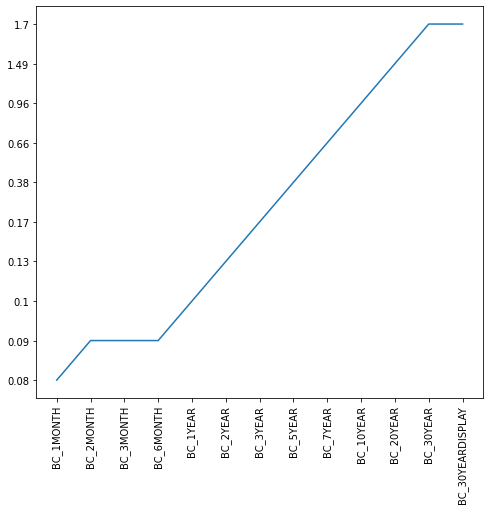

In [ ]:
plt.figure(figsize=[8,8])
plt.plot(df.columns, df.iloc[1])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.2)
plt.show()

In [ ]:
plt.gcf().get_axes?


In [ ]:
plt.gcf().get_axes